<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [95]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [96]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [97]:
data = pd.read_csv('data/train.csv')

In [98]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [99]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [100]:
data.tail()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
5281,19,75.90,1375.6,Female,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0


In [101]:
data.shape

(5282, 20)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [103]:
data.isna().sum().sum()

0

In [104]:
data.duplicated().sum()

14

In [105]:
data=data.drop_duplicates()

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5268 non-null   int64  
 1   MonthlySpending           5268 non-null   float64
 2   TotalSpent                5268 non-null   object 
 3   Sex                       5268 non-null   object 
 4   IsSeniorCitizen           5268 non-null   int64  
 5   HasPartner                5268 non-null   object 
 6   HasChild                  5268 non-null   object 
 7   HasPhoneService           5268 non-null   object 
 8   HasMultiplePhoneNumbers   5268 non-null   object 
 9   HasInternetService        5268 non-null   object 
 10  HasOnlineSecurityService  5268 non-null   object 
 11  HasOnlineBackup           5268 non-null   object 
 12  HasDeviceProtection       5268 non-null   object 
 13  HasTechSupportAccess      5268 non-null   object 
 14  HasOnlin

In [107]:
data.loc[data['TotalSpent']==' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [108]:
data=data.loc[data['TotalSpent']!=' ']

In [109]:
data['TotalSpent']=data['TotalSpent'].astype('float')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5259 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5259 non-null   int64  
 1   MonthlySpending           5259 non-null   float64
 2   TotalSpent                5259 non-null   float64
 3   Sex                       5259 non-null   object 
 4   IsSeniorCitizen           5259 non-null   int64  
 5   HasPartner                5259 non-null   object 
 6   HasChild                  5259 non-null   object 
 7   HasPhoneService           5259 non-null   object 
 8   HasMultiplePhoneNumbers   5259 non-null   object 
 9   HasInternetService        5259 non-null   object 
 10  HasOnlineSecurityService  5259 non-null   object 
 11  HasOnlineBackup           5259 non-null   object 
 12  HasDeviceProtection       5259 non-null   object 
 13  HasTechSupportAccess      5259 non-null   object 
 14  HasOnlin

Пропусков в данных не обнаружено, категориальные и количественные признаки выделены правильно. Целевой признак-Churn. Было найдено 14 дубликатов, которые были удалены. Также удалены пропуски в TotalSpent

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [111]:
for column in cat_cols:
    print(column)
    print(data[column].value_counts())

Sex
Male      2643
Female    2616
Name: Sex, dtype: int64
IsSeniorCitizen
0    4418
1     841
Name: IsSeniorCitizen, dtype: int64
HasPartner
No     2690
Yes    2569
Name: HasPartner, dtype: int64
HasChild
No     3662
Yes    1597
Name: HasChild, dtype: int64
HasPhoneService
Yes    4740
No      519
Name: HasPhoneService, dtype: int64
HasMultiplePhoneNumbers
No                  2494
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64
HasInternetService
Fiber optic    2335
DSL            1793
No             1131
Name: HasInternetService, dtype: int64
HasOnlineSecurityService
No                     2603
Yes                    1525
No internet service    1131
Name: HasOnlineSecurityService, dtype: int64
HasOnlineBackup
No                     2323
Yes                    1805
No internet service    1131
Name: HasOnlineBackup, dtype: int64
HasDeviceProtection
No                     2308
Yes                    1820
No internet service    1131
Name: HasDe

In [112]:
data[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5259.000000,5259.000000,5259.000000
mean,32.536033,65.009755,2297.370441
std,24.513555,30.177418,2269.066122
min,1.000000,18.250000,18.800000
25%,9.000000,35.625000,403.775000
50%,29.000000,70.500000,1415.000000
75%,55.000000,90.050000,3816.625000
max,72.000000,118.750000,8684.800000


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

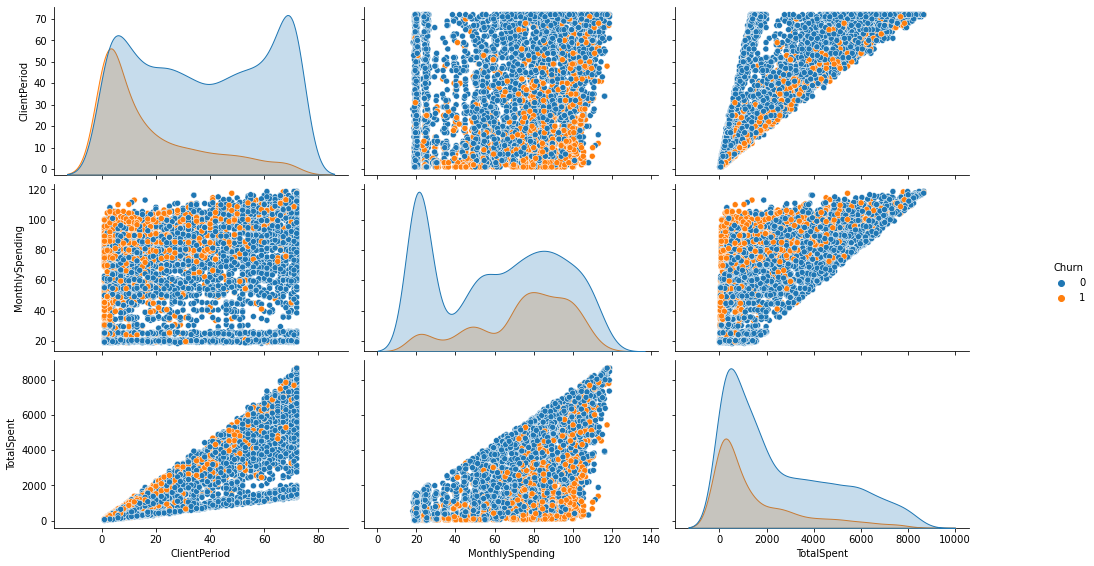

In [113]:
sns.pairplot(data, vars=num_cols, hue='Churn').fig.set_size_inches(16,8)
plt.show()

In [114]:
data.groupby(['Churn'])['TotalSpent'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,3885.0,2566.453089,2331.953005,18.8,571.1500,1714.95,4284.650,8672.45
1,1374.0,1536.536317,1884.074499,19.1,141.9625,713.95,2362.025,8684.80


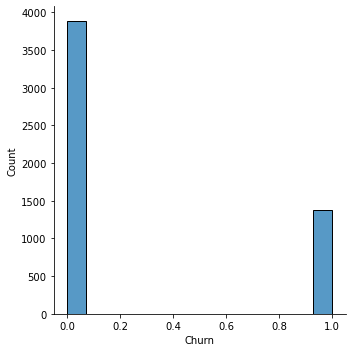

In [115]:
sns.displot(data['Churn'])
plt.show()

In [116]:
data['Churn'].value_counts()[0]/data['Churn'].value_counts()[1]

2.8275109170305677

In [117]:
count_class_0=100*data['Churn'].value_counts()[0]/len(data)
count_class_1=100-count_class_0
print(f'Class 0: {round(count_class_0,1)}%,Class 1: {round(count_class_1,1)}%')

Class 0: 73.9%,Class 1: 26.1%


В тренировочной выборке присутствует легкий дисбаланс классов

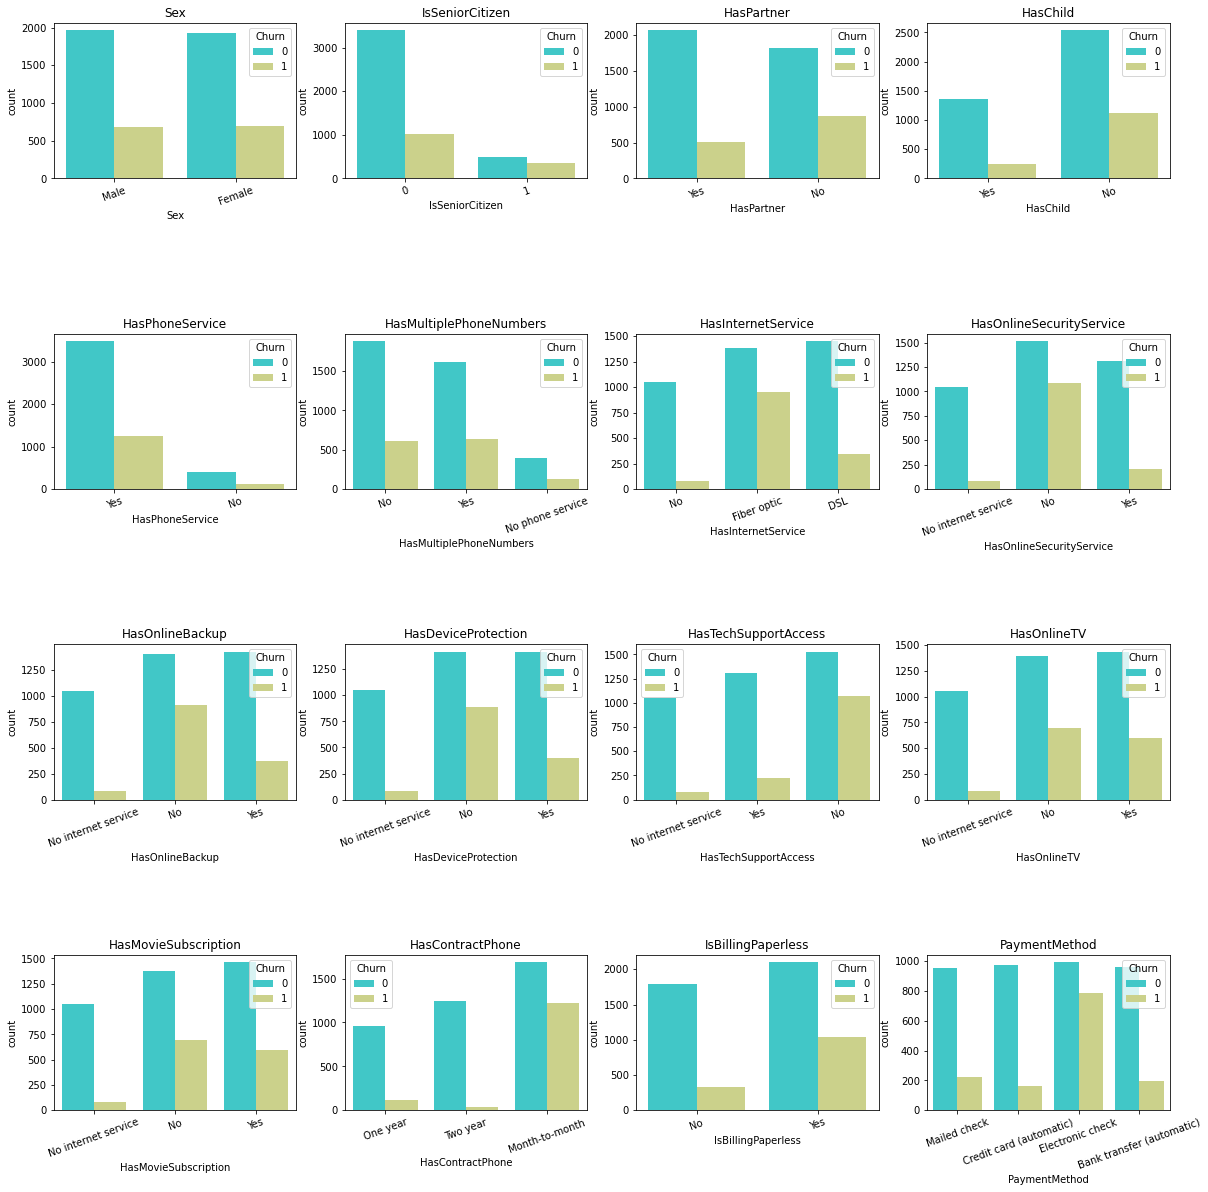

In [118]:
fig, ax = plt.subplots(5,3,figsize=(20,20))

for i, col in enumerate(cat_cols):
    plt.subplot(4, 4, i + 1, title=col)
    sns.countplot(data=data, x=col, hue='Churn',palette='rainbow')
    plt.xticks(rotation=20)
plt.subplots_adjust(hspace=1)
plt.show()

Наибольший отток наблюдается среди клиентов, оплачивающих счета электронным чеком, с помесячной оплатой, отсутствием техподдержки, использующих оптоволоконную сеть. Чаще всего уходят люди не пенсионного возраста и без иждевенцев.

<AxesSubplot:>

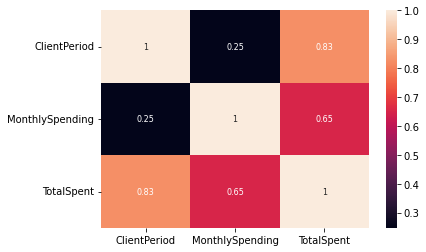

In [119]:
sns.heatmap(data[num_cols].corr(),annot=True,annot_kws={"fontsize":8})

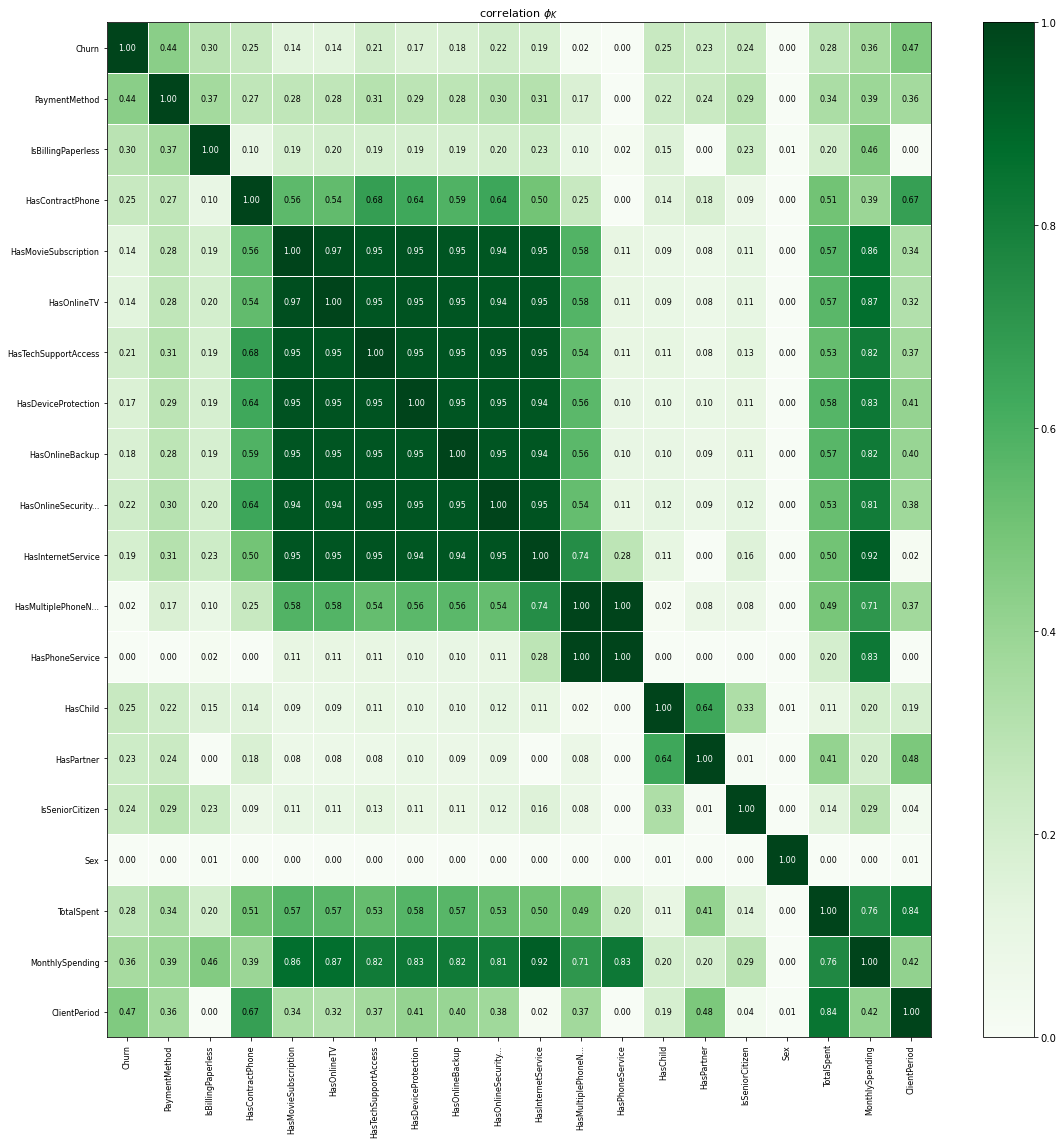

In [120]:
from phik.report import plot_correlation_matrix
phik_overview = data.phik_matrix(interval_cols=num_cols)
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=0.8,
                        figsize=(16, 16))
plt.tight_layout()

Признак MonthlySpending избыточен, имеет высокую ковариационную связь с TotalSpent и признаками доп услуг, это может привести к мультиколлинеарности. Поэтому удалим его

In [121]:
num_cols.remove('MonthlySpending')

In [122]:
print(num_cols)

['ClientPeriod', 'TotalSpent']


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [123]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,precision_score,recall_score

In [124]:
cat_data = data[cat_cols]
num_data = data[num_cols]
dummy_features = pd.get_dummies(cat_data,drop_first=True)

In [125]:
X_train = data.iloc[:, :-1]
y_train = data['Churn']

In [126]:
# X_origin.shape,X.shape

In [127]:
def search_and_draw(X, y, model, params, param_scale='ordinary', draw=True):

    CV_model = GridSearchCV(estimator=model,
                            param_grid=params,
                            cv=5,
                            scoring='roc_auc',
                            n_jobs=-1,
                            verbose=10)
    CV_model.fit(X, y)
    pred_proba = CV_model.predict_proba(X)[:, 1]
    predict = CV_model.predict(X)
    fpr, tpr, thresholds = roc_curve(y, pred_proba)
    acuracy=accuracy_score(y,predict)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()
    print(f"Accuracy: {acuracy}, Best-params: {CV_model.best_params_}")
    return acuracy

In [128]:
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first')
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)
preprocessor = ColumnTransformer(
    transformers=[('num', num_transformer, num_cols),
                  ('cat', cat_transformer, cat_cols)])
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))


Fitting 5 folds for each of 6 candidates, totalling 30 fits


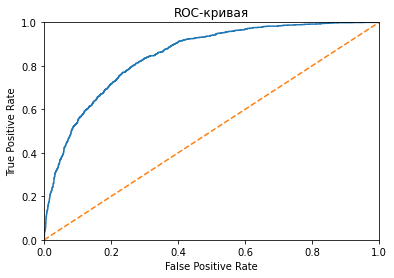

Accuracy: 0.8066172276098118, Best-params: {'logisticregression__C': 100}


In [129]:
param_grid = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]}
search_and_draw(X_train, y_train, model, param_grid, 'order');

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [130]:
best_model = # какая-то предыдущая модель

SyntaxError: invalid syntax (Temp/ipykernel_10632/2282855414.py, line 1)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.